In [1]:
import sys
sys.path.insert(0,'./pyproclus')

In [2]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
import proclus as prc
import plotter
import arffreader as ar
import numpy as np
import adjrand

In [4]:
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data.shape

(811, 107)

In [6]:
data = data.iloc[:,:53]
data.shape

(811, 53)

In [7]:
X = data.iloc[:,1:]
X

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9
5,3,3,2,7,6,3,8,6,6,3,...,4,2,4,3,6,5,3,3,10,6
6,4,8,3,7,8,7,2,3,10,3,...,2,3,3,6,2,6,2,4,2,1
7,8,6,10,9,6,8,7,5,10,10,...,10,14,4,8,8,6,7,4,9,9
8,14,9,10,7,11,15,12,7,13,12,...,11,5,13,3,7,7,10,12,7,13
9,22,19,19,29,20,16,26,20,24,20,...,14,17,11,24,13,16,18,23,18,20


In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

/home/animeshdeb30/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



In [10]:
tsne = TSNE(n_components=2, perplexity = 15, 
            n_iter=5000, method = 'exact')

tsne_result = tsne.fit_transform(X_minmax)

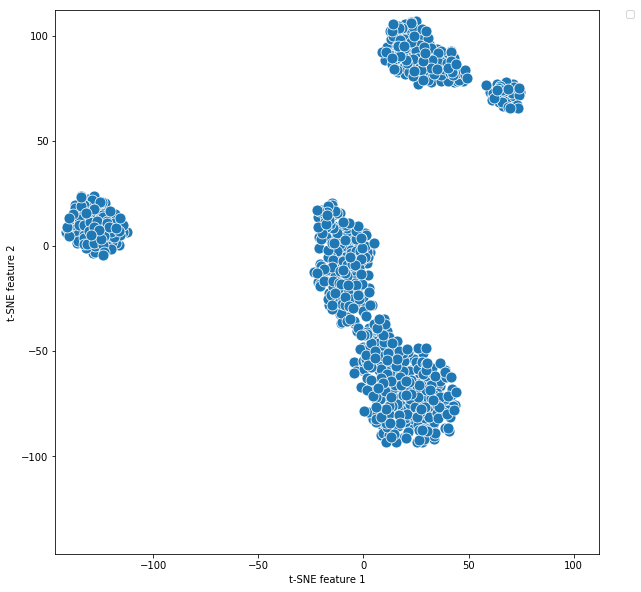

In [11]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1]})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 1))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [61]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(tsne_result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

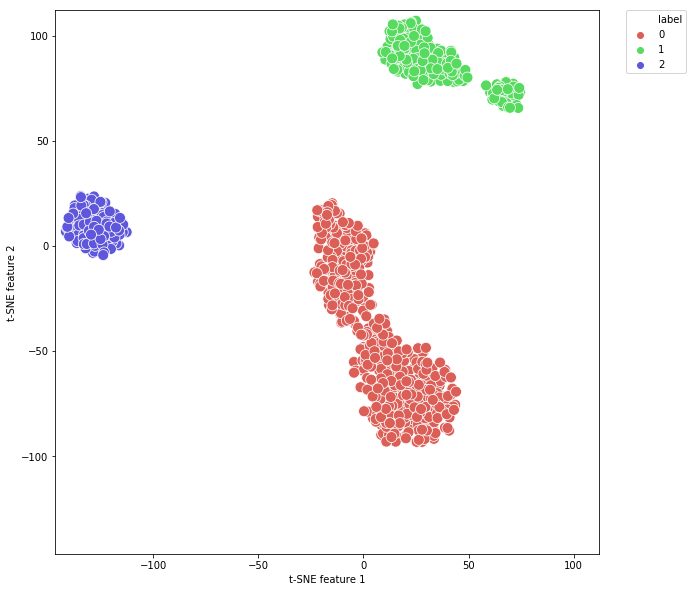

In [63]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1],
                              'label': kmeans.labels_})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', hue='label', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 3))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [64]:
y = kmeans.labels_.copy()
y = y.astype('int64')

In [79]:
R = 1 # toggle run proclus
RS = 0 # toggle use random seed

if R: # run proclus
    rseed = 1116498
    #421302 11 8 40 12
    #998455 5 5 40 12
    #386965 5 5 40 12
    #1116498 5 5 40 12
    #589576 5 5 40 12
    if RS:
        rseed = np.random.randint(low = 0, high = 1239831)

    print "Using seed %d" % rseed

    M, D, A = prc.proclus(X_minmax, k = 5, l = 5, seed = rseed, A = 40, B = 12)
    print "Accuracy: %.4f" % prc.computeBasicAccuracy(A, y)
    adj = adjrand.computeAdjustedRandIndex(A, y)
    print "Adjusted rand index: %.4f" % adj

Using seed 1116498
bad medoids:
[37]
old mcurr:
[333 525  37 112 121]
new mcurr:
[ 89 112 121 333 525]
finished iter: 1
bad medoids:
[112]
old mcurr:
[ 89 112 121 333 525]
new mcurr:
[ 89 121 201 333 525]
finished iter: 2
bad medoids:
[201]
old mcurr:
[ 89 121 201 333 525]
new mcurr:
[ 89 121 333 525 626]
finished iter: 3
finished iter: 4
finished iterative phase...
Accuracy: 0.9692
Adjusted rand index: 0.5635


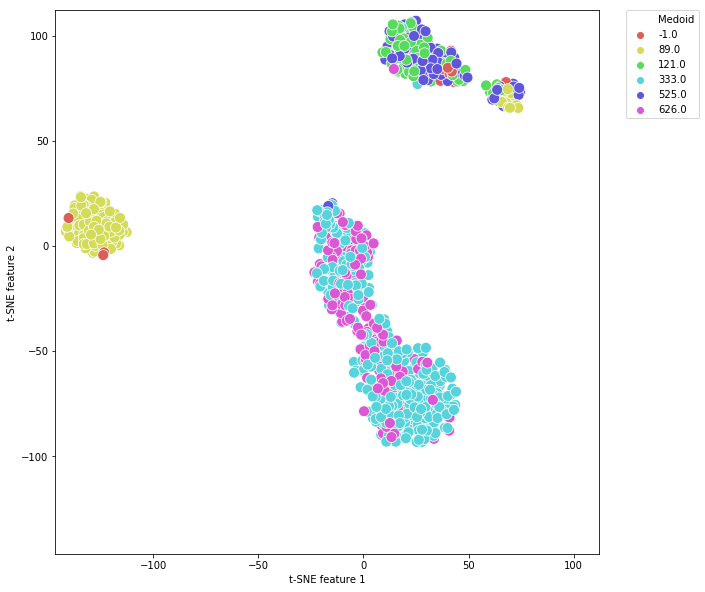

In [80]:
tsne_result_df = pd.DataFrame({'t-SNE feature 1': tsne_result[:,0], 't-SNE feature 2': tsne_result[:,1],
                              'Medoid': A})
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='t-SNE feature 1', y='t-SNE feature 2', hue='Medoid', data=tsne_result_df, 
                ax=ax,s=120, palette = sns.color_palette("hls", 6))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [81]:
np.unique(A, return_counts=True)

(array([ -1.,  89., 121., 333., 525., 626.]),
 array([ 15, 131,  88, 346,  82, 149]))

In [82]:
for i in range (len (D)):
    D[i] = sorted(D[i])
D

[[17, 21, 23, 24, 25, 49, 50, 51],
 [4, 35, 38],
 [13, 15, 38, 45],
 [7, 14, 17, 39],
 [25, 27, 40, 46, 49, 51]]

In [83]:
for i in range(len(D)):
    for j in range(i+1, len(D)):
        print i, j, len(set(D[i]).union(D[j]))

0 1 11
0 2 12
0 3 11
0 4 11
1 2 6
1 3 7
1 4 9
2 3 8
2 4 10
3 4 10


In [84]:
for i in range(len(D)):
    for j in range(i+1, len(D)):
        print i, j, len(set(D[i]).intersection(D[j]))

0 1 0
0 2 0
0 3 1
0 4 3
1 2 1
1 3 0
1 4 0
2 3 0
2 4 0
3 4 0


In [113]:
cluster_1 = 0
cluster_2 = 3
columns_i = sorted(list(set(D[cluster_1]).union(set(D[cluster_2]))))
x_i = X.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [114]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

In [195]:
x_i = X.iloc[:, D[2]]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[2])[0],-1] = 1
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [196]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

In [275]:
x_i.columns

Index([u'attr1', u'attr2', u'attr3', u'attr4', u'y'], dtype='object')

In [276]:
columns_i = list(set(D[cluster_1]).intersection(set(D[cluster_2])))
x_i = x.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 6
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 7
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [277]:
for i in data.columns:
    print(i)

FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Male Sterilization (%) - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Female - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Person - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Male - Total
y


In [278]:
column = []
for i in range(1, len(data.columns)):
    column.append('attr'+str(i))
column.append('y')
data.set_axis(column, axis='columns', inplace=True)
data

,attr1,attr2,attr3,attr4,y
0,0.00,95.50,95.80,96.10,7
1,0.30,93.30,94.40,95.50,7
2,0.20,94.10,94.50,94.90,7
3,0.00,95.60,96.50,97.40,7
4,0.40,94.40,95.00,95.80,7
5,0.30,96.40,96.50,96.70,7
6,0.30,93.10,93.70,94.40,7
7,0.20,99.30,99.40,99.40,6
8,0.30,95.90,96.20,96.60,6
9,0.40,96.80,97.00,97.20,6


In [279]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=6.5)

fig.show()

In [226]:
data.shape

(28, 12)

In [159]:
list(x_i.columns)

['CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Diabetes - Male - Total',
 'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Major - Male - Total',
 'CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Male - Total',
 'CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Female - Total',
 'CHILDHOOD DISEASES - Children suffering from Fever who sought treatment (%) - Total',
 'FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Male Sterilization (%) - Total',
 'FAMILY PLANNING PRACTICES (CMW AGED 15-49 YEARS) - Current Usage - Pills (%) - Total',
 'ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Person - Total',
 'ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Any Source (%) - Male - Total',
 'ACUTE ILLNESS - Persons suffering 

In [280]:
columns_i = list(set(D[cluster_1]).union(set(D[cluster_2])))
x_i = x.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
fig = px.parallel_coordinates(x_i, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [147]:
columns_i = list(set(D[cluster_1]).union(set(D[cluster_2])))
x_i = X.iloc[:, columns_i]
x_i['y'] = np.zeros((x_i.shape[0], 1), dtype = int)
x_i.iloc[np.where(A == M[cluster_1])[0],-1] = 1
x_i.iloc[np.where(A == M[cluster_2])[0],-1] = 2
data = x_i[x_i['y']!=0]
data.reset_index(inplace = True, drop = True)

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [282]:
for i in data.columns:
    print(i)

CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Person - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Hypertension - Female - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Asthma / Chronic Respiratory Disease - Person - Total
CHRONIC ILLNESS - Having diagnosed for Chronic Illness (Per 100,000 Population) - Asthma / Chronic Respiratory Disease - Female - Total
IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children aged 12-23 months who have received BCG (%) - Total
ACUTE ILLNESS - Persons suffering from Acute Illness and taking treatment from Government Source (%) - Male - Total
IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children who did not receive any vaccination (%) - Total
INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Severe - Female - Total
CHILDHOOD DISEASES - Children su

In [283]:
column = []
for i in range(1, len(data.columns)):
    column.append('attr'+str(i))
column.append('y')
data.set_axis(column, axis='columns', inplace=True)
data

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,y
0,2336.00,2063.00,466.00,344.00,94.30,50.10,3.40,33.00,90.70,634.00,...,652.00,0.00,0.00,95.80,96.10,95.50,47.30,89.90,44.50,2
1,1833.00,2124.00,539.00,378.00,93.20,54.40,5.30,24.00,93.50,455.00,...,474.00,0.30,0.00,94.40,95.50,93.30,54.30,94.60,54.10,2
2,3190.00,3203.00,232.00,197.00,97.80,44.30,1.30,88.00,95.90,529.00,...,590.00,0.20,0.00,94.50,94.90,94.10,44.10,65.10,43.90,2
3,1362.00,1186.00,283.00,303.00,96.20,54.00,2.50,12.00,93.90,3225.00,...,3307.00,0.00,0.00,96.50,97.40,95.60,53.80,95.50,53.50,2
4,2252.00,2552.00,511.00,472.00,98.10,62.10,1.60,171.00,85.90,362.00,...,367.00,0.40,0.10,95.00,95.80,94.40,55.10,82.20,48.90,2
5,3634.00,4271.00,625.00,484.00,98.00,64.10,1.60,146.00,90.90,664.00,...,642.00,0.30,0.00,96.50,96.70,96.40,62.60,49.60,61.40,2
6,2528.00,2794.00,402.00,376.00,95.80,39.50,2.50,57.00,79.40,445.00,...,463.00,0.30,0.00,93.70,94.40,93.10,39.00,75.60,38.60,2
7,514.00,598.00,886.00,910.00,91.30,2.50,5.20,37.00,99.30,4584.00,...,4533.00,0.20,0.00,99.40,99.40,99.30,2.60,96.50,2.60,1
8,1324.00,1613.00,707.00,658.00,96.70,3.40,1.90,504.00,98.00,1469.00,...,1230.00,0.30,0.00,96.20,96.60,95.90,3.90,99.20,4.40,1
9,1055.00,1096.00,3879.00,3852.00,96.90,7.50,1.60,666.00,98.20,4709.00,...,4905.00,0.40,0.00,97.00,97.20,96.80,7.20,99.00,6.80,1


In [148]:
fig = px.parallel_coordinates(data, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

In [205]:
for i in x.columns:
    if 'male' in i.lower():
        print(i)

EFFECTIVE LITERACY RATE - Male - Total
EFFECTIVE LITERACY RATE - Female - Total
MARRIAGE - Marriages among Females below legal age (18 years) (%)# - Total
MARRIAGE - Marriages among Males below legal age (21 years) (%)# - Total
MARRIAGE - Mean age at Marriage# - Male - Total
MARRIAGE - Mean age at Marriage# - Female - Total
SCHOOLING STATUS - Children currently attending school (Age 6-17 years) (%) - Male - Total
SCHOOLING STATUS - Children currently attending school (Age 6-17 years) (%) - Female - Total
SCHOOLING STATUS - Children attended before / Drop out (Age 6-17 years) (%) - Male - Total
SCHOOLING STATUS - Children attended before / Drop out (Age 6-17 years) (%) - Female - Total
WORK STATUS - Children aged 5-14 years engaged in work (%) - Male - Total
WORK STATUS - Children aged 5-14 years engaged in work (%) - Female - Total
WORK STATUS - Work Participation Rate (15 years and above) - Male - Total
WORK STATUS - Work Participation Rate (15 years and above) - Female - Total
DISABI

In [164]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [165]:
X_new = SelectKBest(chi2, k=10).fit_transform(data.iloc[:,:-1], data.iloc[:,-1])

In [137]:
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection.univariate_selection:

class SelectKBest(_BaseFilter)
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like, shape=(n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like, shape=(n_features,)
 |      p-values of feature scores, None if `score_func` returned only scores.
 |  
 |  Examples
 |  --------
 | 

In [166]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [285]:
clf = ExtraTreesClassifier(n_estimators=10)
clf = clf.fit(data.iloc[:,:-1], data.iloc[:,-1])
arr = clf.feature_importances_.copy()
inv_rank = arr.argsort().argsort()

In [286]:
clf.feature_importances_

array([0.02018761, 0.00454551, 0.05181897, 0.00775052, 0.        ,
       0.25000899, 0.00846161, 0.00463549, 0.13593293, 0.0090154 ,
       0.09206244, 0.00182143, 0.        , 0.00379278, 0.05003125,
       0.01402251, 0.05762526, 0.15574059, 0.07670809, 0.05583862])

In [287]:
inv_rank

array([10,  4, 12,  6,  0, 19,  7,  5, 17,  8, 16,  2,  1,  3, 11,  9, 14,
       18, 15, 13])

In [288]:
np.where(inv_rank >(max(inv_rank)-10))[0]

array([ 0,  2,  5,  8, 10, 14, 16, 17, 18, 19])

In [292]:
data2 = data.iloc[:,np.where(inv_rank >(max(inv_rank)-5))[0]]
data2['y'] = data.loc[:, 'y']
fig = px.parallel_coordinates(data2, color="y",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1.5)
fig.show()

/home/animeshdeb30/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [222]:
data.columns

Index([u'ANTE NATAL CARE - Mothers who consumed IFA for 100 days or more (%) - Total',
       u'ANTE NATAL CARE - Mothers who had Full Antenatal Check-up (%) - Total',
       u'WORK STATUS - Children aged 5-14 years engaged in work (%) - Person - Total',
       u'WORK STATUS - Children aged 5-14 years engaged in work (%) - Female - Total',
       u'WORK STATUS - Work Participation Rate (15 years and above) - Person - Total',
       u'WORK STATUS - Work Participation Rate (15 years and above) - Female - Total',
       u'DISABILITY - Prevalence of any type of Disability (Per 100,000 Population) - Person - Total',
       u'IMMUNIZATION, VITAMIN A & IRON SUPPLEMENT AND BIRTH WEIGHT - Children whose birth weight was taken (%) - Total',
       u'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Severe - Female - Total',
       u'INJURY - Number of Injured Persons by type of Treatment received (Per 100,000 Population) - Major - Male - Total',
       u

In [290]:
data.shape

(102, 21)

In [291]:
X_minmax.shape

(284, 208)